<a href="https://colab.research.google.com/github/musthafa145/EDA-Exploratory-Data-Analysis-on-image/blob/main/gunimageEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Shape: (775, 1033, 3)
Image Size: 2401725 pixels
Color Channels: 3


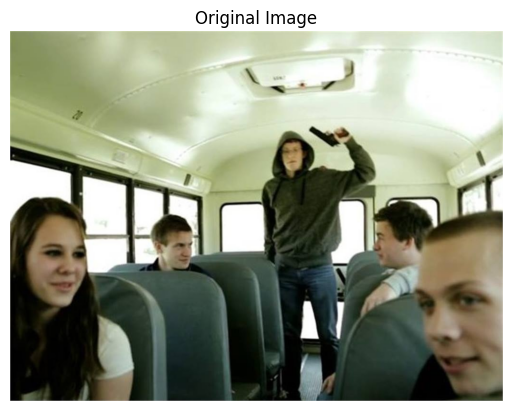

In [ ]:
# Install required packages (if needed)
!pip install -q opencv-python-headless scikit-learn pytesseract matplotlib

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pytesseract

# Load image
image_path = "/content/111.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Basic info
print(f"Image Shape: {image.shape}")
print(f"Image Size: {image.size} pixels")
print(f"Color Channels: {image.shape[2]}")

# Show original image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


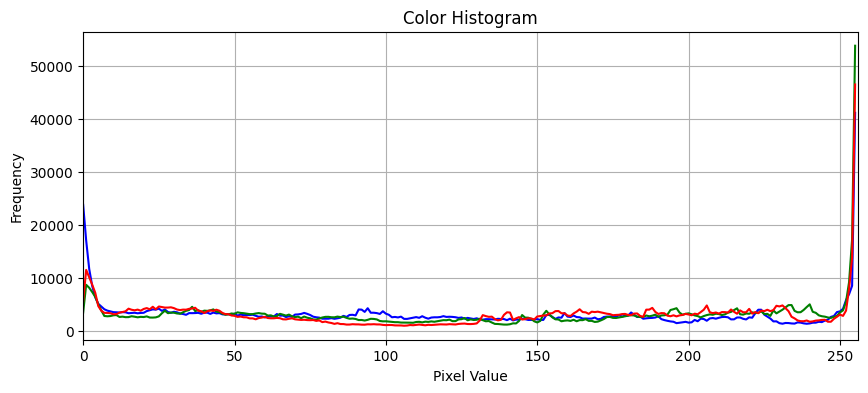

In [ ]:
# Color histogram for each channel
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 4))
plt.title("Color Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

for i, col in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

plt.grid(True)
plt.show()


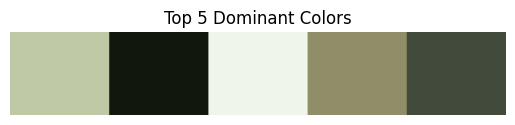

In [ ]:
from sklearn.cluster import KMeans

# Reshape image to a list of pixels
pixels = image_rgb.reshape((-1, 3))

# Apply KMeans clustering
k = 5  # number of dominant colors
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)
dominant_colors = np.array(kmeans.cluster_centers_, dtype='uint8')

# Show dominant colors as a palette
palette = np.zeros((50, 300, 3), dtype='uint8')
steps = 300 // k
for i, color in enumerate(dominant_colors):
    palette[:, i*steps:(i+1)*steps, :] = color

plt.imshow(palette)
plt.title("Top 5 Dominant Colors")
plt.axis('off')
plt.show()


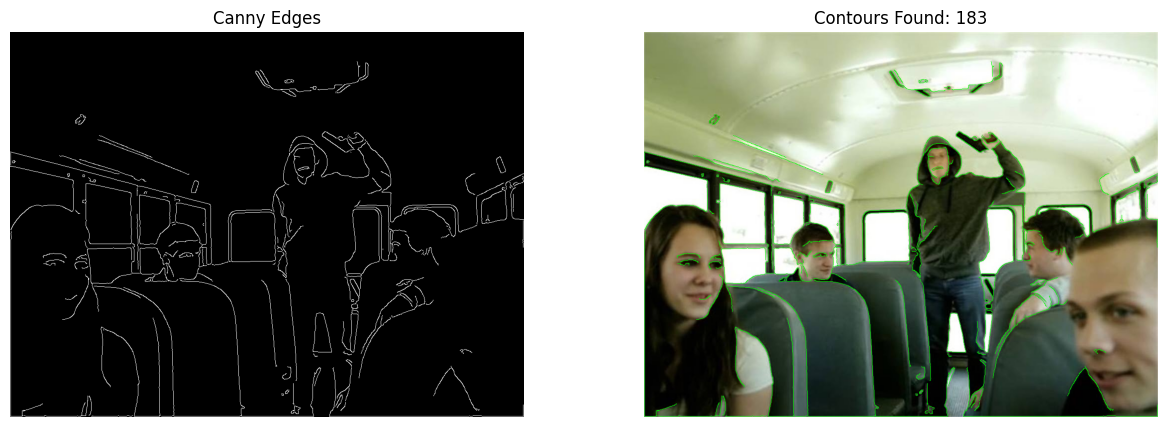

In [ ]:
# Step 1: Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 2: Detect edges using Canny
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Step 3: Find contours
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = image_rgb.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 1)

# Display edges
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_with_contours)
plt.title(f"Contours Found: {len(contours)}")
plt.axis("off")

plt.show()


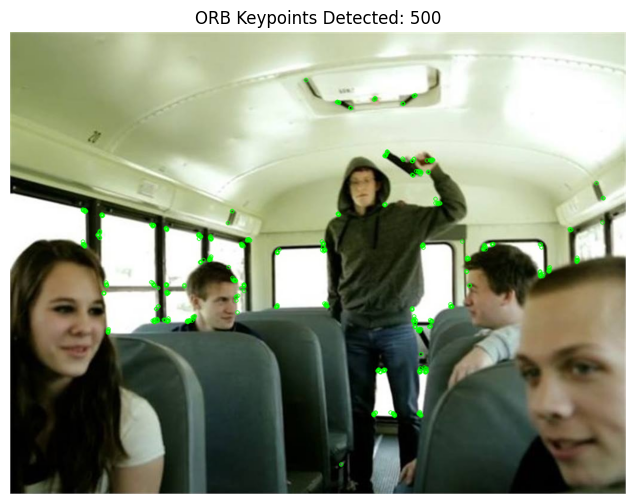

In [ ]:
# Initialize ORB detector
orb = cv2.ORB_create(nfeatures=500)

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image_rgb, keypoints, None, color=(0, 255, 0), flags=0)

# Display keypoints
plt.figure(figsize=(10, 6))
plt.imshow(image_with_keypoints)
plt.title(f"ORB Keypoints Detected: {len(keypoints)}")
plt.axis("off")
plt.show()


Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.55 MiB | 13.78 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-6-3 Python-3.11.12 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 122MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


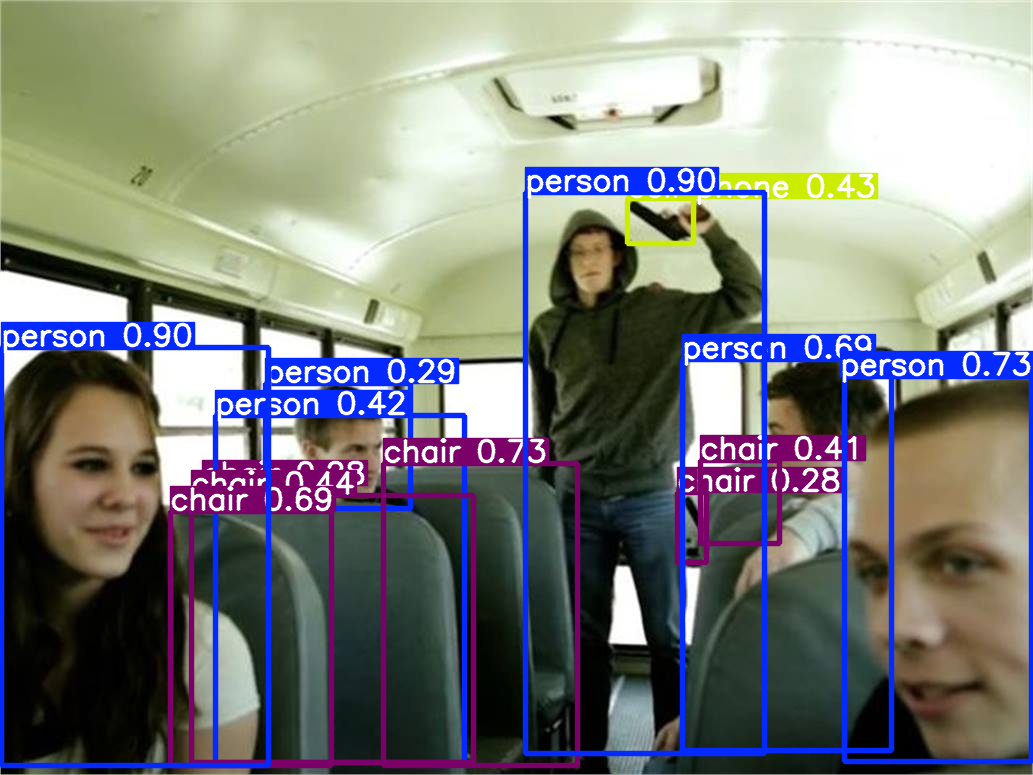

          xmin        ymin         xmax        ymax  confidence  class  \
0     1.957845  347.949402   268.504150  765.468506    0.899127      0   
1   525.322205  192.546127   764.627869  753.662964    0.898909      0   
2   844.656860  376.481293  1031.504883  761.505981    0.727614      0   
3   383.508545  463.019348   577.151123  765.123535    0.725459     56   
4   170.747513  511.167572   331.646149  765.464233    0.693343     56   
5   682.365845  359.201538   891.995483  750.747620    0.688584      0   
6   191.799576  495.793304   473.355743  762.602112    0.442919     56   
7   627.059265  198.603867   693.962402  243.537994    0.434664     67   
8   215.711716  415.275299   464.226196  762.712769    0.420276      0   
9   700.861328  460.059967   779.619141  543.760193    0.414708     56   
10  265.611694  383.409973   410.581482  508.261688    0.285085      0   
11  677.974609  492.131470   706.037964  562.311157    0.282065     56   
12  202.314453  485.350800   298.66900

In [ ]:
# Clone YOLOv5 repo and install requirements
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -qr requirements.txt

import torch
from matplotlib import pyplot as plt
from pathlib import Path
import cv2

# Load pretrained YOLOv5s model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load image
img_path = '/content/111.jpg'
img = cv2.imread(img_path)[:,:,::-1]  # BGR to RGB

# Perform inference
results = model(img)

# Display results
results.show()

# To get pandas DataFrame of detections:
df = results.pandas().xyxy[0]
print(df)


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Filter detections for class "cell phone" (class=67)
cell_phone_detections = df[df['class'] == 67]

if cell_phone_detections.empty:
    print("No cell phone detected.")
else:
    # Just take the first detection for analysis
    det = cell_phone_detections.iloc[0]
    xmin, ymin, xmax, ymax = map(int, [det['xmin'], det['ymin'], det['xmax'], det['ymax']])

    print(f"Cropping area: xmin={xmin}, ymin={ymin}, xmax={xmax}, ymax={ymax}")

    # Crop the detected area from original image (BGR)
    crop = cv2.imread(img_path)[ymin:ymax, xmin:xmax]
    crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
    crop_gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

    # Show cropped image
    plt.figure(figsize=(5,5))
    plt.imshow(crop_rgb)
    plt.title("Cropped Detected Area (Cell Phone)")
    plt.axis("off")
    plt.show()

    # Histogram of cropped area
    plt.figure(figsize=(10,4))
    colors = ('r','g','b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([crop_rgb],[i],None,[256],[0,256])
        plt.plot(hist, color=col)
        plt.xlim([0,256])
    plt.title("Histogram of Cropped Area")
    plt.show()

    # Edge detection (Canny)
    edges = cv2.Canny(crop_gray, 50, 150)
    plt.figure(figsize=(5,5))
    plt.imshow(edges, cmap='gray')
    plt.title("Edges in Cropped Area")
    plt.axis("off")
    plt.show()

    # ORB keypoints in crop
    orb = cv2.ORB_create(nfeatures=200)
    kp, des = orb.detectAndCompute(crop_gray, None)
    crop_with_kp = cv2.drawKeypoints(crop_rgb, kp, None, color=(0,255,0))
    plt.figure(figsize=(5,5))
    plt.imshow(crop_with_kp)
    plt.title(f"ORB Keypoints in Cropped Area ({len(kp)} keypoints)")
    plt.axis("off")
    plt.show()


Cropping area: xmin=627, ymin=198, xmax=693, ymax=243


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.models import mobilenet_v2
from PIL import Image

# --- Crop the detected "cell phone" area ---
cell_phone_detections = df[df['class'] == 67]

if cell_phone_detections.empty:
    print("No cell phone detected.")
else:
    det = cell_phone_detections.iloc[0]
    xmin, ymin, xmax, ymax = map(int, [det['xmin'], det['ymin'], det['xmax'], det['ymax']])
    print(f"Cropping area: xmin={xmin}, ymin={ymin}, xmax={xmax}, ymax={ymax}")

    # Load original image in BGR, crop, and convert to RGB and gray
    original_bgr = cv2.imread(img_path)
    crop_bgr = original_bgr[ymin:ymax, xmin:xmax]
    crop_rgb = cv2.cvtColor(crop_bgr, cv2.COLOR_BGR2RGB)
    crop_gray = cv2.cvtColor(crop_bgr, cv2.COLOR_BGR2GRAY)

    # --- Display enlarged crop ---
    plt.figure(figsize=(6,6))
    plt.imshow(crop_rgb)
    plt.title("Cropped Detected Area (Cell Phone)")
    plt.axis('off')
    plt.show()

    # --- Color Histogram ---
    plt.figure(figsize=(10,4))
    colors = ('r','g','b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([crop_rgb], [i], None, [256], [0,256])
        plt.plot(hist, color=col)
        plt.xlim([0,256])
    plt.title("Color Histogram of Cropped Area")
    plt.show()

    # --- Edge Detection ---
    edges = cv2.Canny(crop_gray, 50, 150)
    plt.figure(figsize=(6,6))
    plt.imshow(edges, cmap='gray')
    plt.title("Edges in Cropped Area")
    plt.axis('off')
    plt.show()

    # --- ORB Keypoints ---
    orb = cv2.ORB_create(nfeatures=200)
    kp, des = orb.detectAndCompute(crop_gray, None)
    crop_with_kp = cv2.drawKeypoints(crop_rgb, kp, None, color=(0,255,0))
    plt.figure(figsize=(6,6))
    plt.imshow(crop_with_kp)
    plt.title(f"ORB Keypoints in Cropped Area ({len(kp)} keypoints)")
    plt.axis('off')
    plt.show()

    # --- Classification with MobileNetV2 ---
    # Load pretrained MobileNetV2
    model = mobilenet_v2(pretrained=True).eval()

    # Preprocessing pipeline for MobileNetV2
    preprocess = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])

    input_tensor = preprocess(crop_rgb)
    input_batch = input_tensor.unsqueeze(0)  # batch dimension

    # Run inference
    with torch.no_grad():
        output = model(input_batch)

    # Load ImageNet labels
    import urllib.request
    url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
    labels_path = "/content/imagenet_classes.txt"
    urllib.request.urlretrieve(url, labels_path)
    with open(labels_path) as f:
        labels = [line.strip() for line in f.readlines()]

    # Get top 5 predictions
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    top5_prob, top5_catid = torch.topk(probabilities, 5)

    print("Top 5 ImageNet classification predictions for cropped area:")
    for i in range(top5_prob.size(0)):
        print(f"{labels[top5_catid[i]]}: {top5_prob[i].item()*100:.2f}%")


Cropping area: xmin=627, ymin=198, xmax=693, ymax=243


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 61.8MB/s]


Top 5 ImageNet classification predictions for cropped area:
letter opener: 20.55%
cleaver: 15.25%
hatchet: 9.02%
bolo tie: 6.35%
spatula: 5.80%


In [ ]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt

class ObjectFeatureExtractor:
    def __init__(self, nfeatures=200, hist_bins=32):
        self.orb = cv2.ORB_create(nfeatures=nfeatures)
        self.hist_bins = hist_bins

    def extract_features(self, img):
        """Extract ORB keypoints/descriptors and color histogram from an RGB image."""
        if len(img.shape) == 2:
            img_gray = img
            img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            img_rgb = img
            img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

        # ORB keypoints + descriptors
        kp, des = self.orb.detectAndCompute(img_gray, None)

        # Color histogram for each channel
        hist = []
        for i in range(3):  # RGB channels
            channel_hist = cv2.calcHist([img_rgb], [i], None, [self.hist_bins], [0, 256])
            channel_hist = cv2.normalize(channel_hist, channel_hist).flatten()
            hist.append(channel_hist)
        hist = np.concatenate(hist)

        return {
            'keypoints': kp,
            'descriptors': des,
            'color_histogram': hist
        }

    def save_features(self, features, filename):
        """Save descriptors and histogram to a file (pickle)."""
        # Cannot save keypoints directly - convert to list of tuples
        kp_list = []
        for kp in features['keypoints']:
            kp_list.append((kp.pt, kp.size, kp.angle, kp.response, kp.octave, kp.class_id))
        data_to_save = {
            'keypoints': kp_list,
            'descriptors': features['descriptors'],
            'color_histogram': features['color_histogram']
        }
        with open(filename, 'wb') as f:
            pickle.dump(data_to_save, f)
        print(f"Features saved to {filename}")

    def load_features(self, filename):
        """Load saved features and reconstruct keypoints."""
        with open(filename, 'rb') as f:
            data = pickle.load(f)
        kp_list = data['keypoints']
        kp = []
        for point in kp_list:
            x, y = point[0]
            size, angle, response, octave, class_id = point[1:]
            keypoint = cv2.KeyPoint(x, y, size, angle, response, octave, class_id)
            kp.append(keypoint)
        return {
            'keypoints': kp,
            'descriptors': data['descriptors'],
            'color_histogram': data['color_histogram']
        }

    def match_features(self, features1, features2, ratio_test=0.75):
        """Match ORB descriptors and compare color histograms. Returns combined similarity score."""
        des1 = features1['descriptors']
        des2 = features2['descriptors']
        if des1 is None or des2 is None:
            print("No descriptors to match.")
            return 0, 1.0  # zero matches, histogram distance = max

        # BFMatcher with Hamming distance for ORB
        bf = cv2.BFMatcher(cv2.NORM_HAMMING)
        matches = bf.knnMatch(des1, des2, k=2)

        # Apply Lowe's ratio test
        good_matches = []
        for m,n in matches:
            if m.distance < ratio_test * n.distance:
                good_matches.append(m)

        # Color histogram distance (correlation)
        hist1 = features1['color_histogram']
        hist2 = features2['color_histogram']
        hist_distance = cv2.compareHist(hist1.astype(np.float32), hist2.astype(np.float32), cv2.HISTCMP_CORREL)
        # hist_distance close to 1 means similar

        return len(good_matches), hist_distance

# --- Example Usage ---

# Load image and crop detected area (replace with your own crop coords)
img_path = "/content/111.jpg"
img = cv2.imread(img_path)
crop = img[198:243, 627:693]  # BGR
crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)

extractor = ObjectFeatureExtractor()

# Extract and save features for this crop
features = extractor.extract_features(crop_rgb)
extractor.save_features(features, "/content/saved_features.pkl")

# Later... load features and compare to a new crop from a new image
loaded_features = extractor.load_features("/content/saved_features.pkl")

# Suppose you have another crop_rgb2 from another image:
# crop_rgb2 = ...

# Extract features for new crop
# new_features = extractor.extract_features(crop_rgb2)

# Match features
# matches_count, hist_sim = extractor.match_features(loaded_features, new_features)
# print(f"Good ORB matches: {matches_count}, Color histogram correlation: {hist_sim:.3f}")


Features saved to /content/saved_features.pkl


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ObjectFeatureExtractor:
    def __init__(self, nfeatures=200, hist_bins=32):
        self.orb = cv2.ORB_create(nfeatures=nfeatures)
        self.hist_bins = hist_bins

    def extract_features(self, img):
        if len(img.shape) == 2:
            img_gray = img
            img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            img_rgb = img
            img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

        kp, des = self.orb.detectAndCompute(img_gray, None)

        hist = []
        for i in range(3):
            channel_hist = cv2.calcHist([img_rgb], [i], None, [self.hist_bins], [0, 256])
            channel_hist = cv2.normalize(channel_hist, channel_hist).flatten()
            hist.append(channel_hist)
        hist = np.concatenate(hist)

        return {'keypoints': kp, 'descriptors': des, 'color_histogram': hist}

    def load_features(self, filename):
        import pickle
        with open(filename, 'rb') as f:
            data = pickle.load(f)
        kp_list = data['keypoints']
        kp = []
        for point in kp_list:
            x, y = point[0]
            size, angle, response, octave, class_id = point[1:]
            keypoint = cv2.KeyPoint(x, y, size, angle, response, octave, class_id)
            kp.append(keypoint)
        return {'keypoints': kp, 'descriptors': data['descriptors'], 'color_histogram': data['color_histogram']}

    def match_and_find_object(self, saved_features, query_img, min_match_count=10):
        # Extract features from query image
        features_query = self.extract_features(query_img)
        des1 = saved_features['descriptors']
        des2 = features_query['descriptors']

        if des1 is None or des2 is None:
            print("No descriptors found in either image.")
            return None, None

        bf = cv2.BFMatcher(cv2.NORM_HAMMING)
        matches = bf.knnMatch(des1, des2, k=2)

        # Apply Lowe's ratio test
        good = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good.append(m)

        if len(good) > min_match_count:
            src_pts = np.float32([saved_features['keypoints'][m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
            dst_pts = np.float32([features_query['keypoints'][m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

            # Find homography with RANSAC
            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

            if M is not None:
                h, w = query_img.shape[:2]
                pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
                dst = cv2.perspectiveTransform(pts, M)
                return good, dst
            else:
                print("Homography could not be computed.")
                return None, None
        else:
            print(f"Not enough matches are found - {len(good)}/{min_match_count}")
            return None, None


# --- Usage ---

import pickle

# Load saved object features
extractor = ObjectFeatureExtractor()
saved_features = extractor.load_features("/content/saved_features.pkl")

# Load new image
img_new = cv2.imread("/content/103.jpg")
img_new_rgb = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)

# Try to find saved object inside new image
good_matches, object_corners = extractor.match_and_find_object(saved_features, img_new_rgb)

if good_matches is not None and object_corners is not None:
    print(f"Found object with {len(good_matches)} good matches!")

    # Draw polygon around detected object
    img_detect = img_new_rgb.copy()
    object_corners = np.int32(object_corners)
    cv2.polylines(img_detect, [object_corners], True, (255, 0, 0), 3)

    plt.figure(figsize=(10, 7))
    plt.imshow(img_detect)
    plt.title("Detected Object Location")
    plt.axis('off')
    plt.show()
else:
    print("Object NOT found in the new image.")


No descriptors found in either image.
Object NOT found in the new image.


In [ ]:
import pickle

with open("/content/saved_features.pkl", "rb") as f:
    saved_features = pickle.load(f)

print("Saved descriptors shape:", None if saved_features['descriptors'] is None else saved_features['descriptors'].shape)
print("Number of saved keypoints:", len(saved_features['keypoints']))


Saved descriptors shape: None
Number of saved keypoints: 0


In [ ]:
import cv2
import pickle

# Load and crop the original image
img = cv2.imread("/content/111.jpg")
crop = img[198:243, 627:693]
crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)

# Initialize ORB
orb = cv2.ORB_create(nfeatures=500)

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(crop_rgb, None)

# Check how many we got
print("Extracted keypoints:", len(keypoints))
print("Descriptors shape:", None if descriptors is None else descriptors.shape)

# Convert keypoints to a serializable format
kp_serialized = []
for kp in keypoints:
    kp_serialized.append((
        (kp.pt[0], kp.pt[1]), kp.size, kp.angle, kp.response, kp.octave, kp.class_id
    ))

# Save
with open("/content/saved_features.pkl", "wb") as f:
    pickle.dump({
        'keypoints': kp_serialized,
        'descriptors': descriptors
    }, f)

print("✅ Features saved successfully.")


Extracted keypoints: 0
Descriptors shape: None
✅ Features saved successfully.


In [ ]:
# Load and enlarge the crop by expanding around the original bbox
img = cv2.imread("/content/111.jpg")

# Expand the box slightly around the original crop
xmin, ymin, xmax, ymax = 627 - 20, 198 - 20, 693 + 20, 243 + 20
crop = img[ymin:ymax, xmin:xmax]
crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)

# ORB again
orb = cv2.ORB_create(nfeatures=500)
keypoints, descriptors = orb.detectAndCompute(crop_rgb, None)

print("Extracted keypoints:", len(keypoints))
print("Descriptors shape:", None if descriptors is None else descriptors.shape)

# Serialize and save if valid
if descriptors is not None:
    kp_serialized = []
    for kp in keypoints:
        kp_serialized.append((
            (kp.pt[0], kp.pt[1]), kp.size, kp.angle, kp.response, kp.octave, kp.class_id
        ))

    with open("/content/saved_features.pkl", "wb") as f:
        pickle.dump({
            'keypoints': kp_serialized,
            'descriptors': descriptors
        }, f)

    print("✅ Features saved successfully.")
else:
    print("❌ Still no descriptors. Region may be too plain or blurry.")


Extracted keypoints: 13
Descriptors shape: (13, 32)
✅ Features saved successfully.


In [ ]:
import cv2
import pickle

# Load saved features
with open("/content/saved_features.pkl", "rb") as f:
    saved_data = pickle.load(f)

# Restore keypoints using positional arguments
keypoints = []
for pt, size, angle, response, octave, class_id in saved_data['keypoints']:
    kp = cv2.KeyPoint(pt[0], pt[1], size, angle, response, octave, class_id)
    keypoints.append(kp)

descriptors_saved = saved_data['descriptors']

# Load the new image
img_new = cv2.imread("/content/103.jpg")
img_new_gray = cv2.cvtColor(img_new, cv2.COLOR_BGR2GRAY)

# ORB on the new image
orb = cv2.ORB_create(nfeatures=1000)
keypoints_new, descriptors_new = orb.detectAndCompute(img_new_gray, None)

print("Keypoints in new image:", len(keypoints_new))

# Match features if descriptors are valid
if descriptors_new is not None:
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors_saved, descriptors_new)

    # Sort by match distance
    matches = sorted(matches, key=lambda x: x.distance)
    print(f"Top match distances: {[m.distance for m in matches[:10]]}")
    print("Total matches:", len(matches))

    if len(matches) > 5 and matches[0].distance < 40:
        print("✅ Object FOUND in new image.")
    else:
        print("❌ Object NOT found in new image.")
else:
    print("❌ No descriptors found in the new image.")


Keypoints in new image: 1000
Top match distances: [54.0, 54.0, 55.0, 56.0, 57.0, 57.0, 59.0, 60.0, 62.0, 65.0]
Total matches: 10
❌ Object NOT found in new image.


In [ ]:
import cv2
import torch
import torchvision.transforms as transforms
from torchvision import models
import pickle

# Load and crop the original image
img = cv2.imread("/content/111.jpg")
crop = img[198:243, 627:693]  # Replace with exact coords again if needed

# Load MobileNetV2
model = models.mobilenet_v2(pretrained=True).features.eval()

# Preprocessing
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Extract deep features
input_tensor = preprocess(crop).unsqueeze(0)
with torch.no_grad():
    features = model(input_tensor).squeeze().numpy()

# Save features and shape
data = {
    "features": features.flatten(),
    "shape": crop.shape[:2]  # height, width
}

with open("/content/saved_features.pkl", "wb") as f:
    pickle.dump(data, f)

print("✅ Deep features saved successfully.")


✅ Deep features saved successfully.


In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision import models
import pickle
from scipy.spatial.distance import cosine

# Load saved features
with open("/content/saved_features.pkl", "rb") as f:
    saved_data = pickle.load(f)

saved_features = saved_data["features"]
crop_h, crop_w = saved_data["shape"]

# Load new image
img = cv2.imread("/content/103.jpg")
img_h, img_w = img.shape[:2]

# Load MobileNetV2 model
model = models.mobilenet_v2(pretrained=True).features.eval()

# Preprocessing
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Sliding window
step = max(20, crop_w // 4)
best_score = float("inf")
best_region = None

for y in range(0, img_h - crop_h, step):
    for x in range(0, img_w - crop_w, step):
        patch = img[y:y+crop_h, x:x+crop_w]
        if patch.shape[0] != crop_h or patch.shape[1] != crop_w:
            continue
        input_tensor = preprocess(patch).unsqueeze(0)
        with torch.no_grad():
            features = model(input_tensor).squeeze().numpy().flatten()
        score = cosine(features, saved_features)
        if score < best_score:
            best_score = score
            best_region = (x, y, x + crop_w, y + crop_h)

print(f"Best cosine distance: {best_score:.4f}")
if best_score < 0.3:
    x1, y1, x2, y2 = best_region
    print(f"✅ Match found at: ({x1}, {y1}) to ({x2}, {y2})")
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.imwrite("/content/matched_result.jpg", img)
else:
    print("❌ Object NOT found in the new image.")


Best cosine distance: 0.5612
❌ Object NOT found in the new image.


In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision import models
import pickle
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

# Load saved features
with open("/content/saved_features.pkl", "rb") as f:
    saved_data = pickle.load(f)

saved_features = saved_data["features"]
crop_h, crop_w = saved_data["shape"]

# Load new image
img = cv2.imread("/content/103.jpg")
img_h, img_w = img.shape[:2]

# Load MobileNetV2 model
model = models.mobilenet_v2(pretrained=True).features.eval()

# Preprocessing
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

step = max(20, crop_w // 4)
heatmap = np.zeros(((img_h - crop_h) // step + 1, (img_w - crop_w) // step + 1))

for i, y in enumerate(range(0, img_h - crop_h, step)):
    for j, x in enumerate(range(0, img_w - crop_w, step)):
        patch = img[y:y+crop_h, x:x+crop_w]
        if patch.shape[0] != crop_h or patch.shape[1] != crop_w:
            continue
        input_tensor = preprocess(patch).unsqueeze(0)
        with torch.no_grad():
            features = model(input_tensor).squeeze().numpy().flatten()
        score = cosine(features, saved_features)
        heatmap[i, j] = 1 - score  # similarity = 1 - distance (higher means more similar)

# Resize heatmap to image size for better visualization
heatmap_resized = cv2.resize(heatmap, (img_w, img_h))

plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)  # Overlay heatmap with transparency
plt.colorbar(label='Similarity (higher = more similar)')
plt.title('Similarity Heatmap Overlay')
plt.axis('off')
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)  # Overlay heatmap with transparency
plt.colorbar(label='Similarity (higher = more similar)')
plt.title('Similarity Heatmap Overlay')
plt.axis('off')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display

plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)  # Overlay heatmap
plt.colorbar(label='Similarity (higher = more similar)')
plt.title('Similarity Heatmap Overlay')
plt.axis('off')
plt.show()



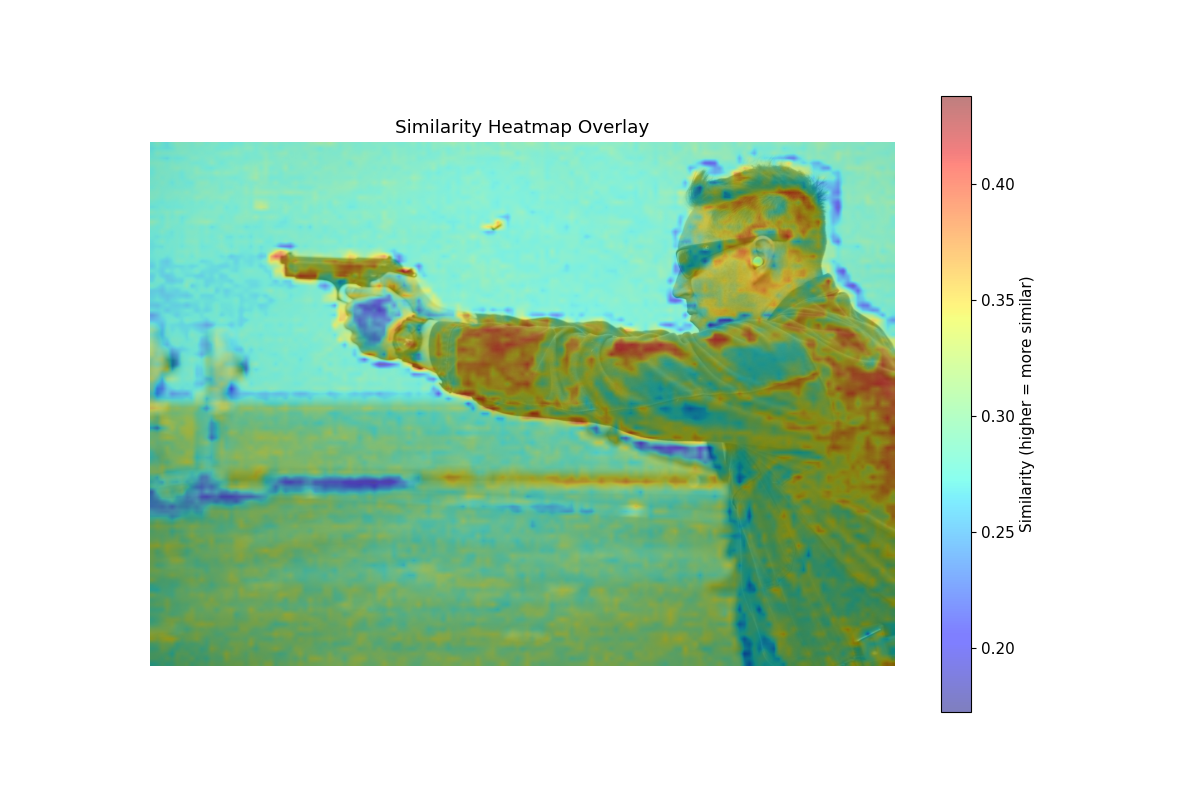

In [ ]:
from PIL import Image
import io
import base64
from IPython.display import HTML

# Save plot to buffer
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)

# Display image inline in HTML
img_str = base64.b64encode(buf.read()).decode('utf-8')
display(HTML(f'<img src="data:image/png;base64,{img_str}" width=900>'))


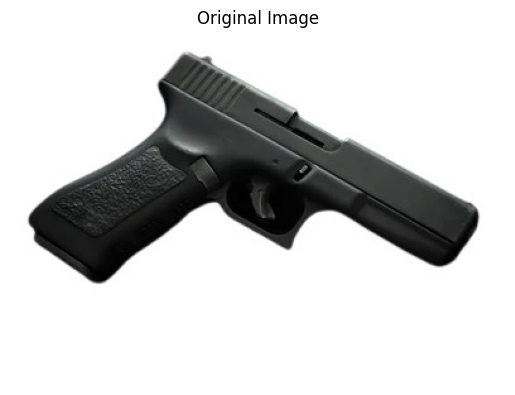

In [ ]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load image
img_path = "/content/iiiii.jpg"
img = Image.open(img_path).convert("RGB")

plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()


In [ ]:
# Load pretrained DeepLabV3 model
model = torch.hub.load('pytorch/vision:v0.15.2', 'deeplabv3_resnet101', pretrained=True)
model.eval()

# Preprocessing transform
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(img).unsqueeze(0)


Downloading: "https://github.com/pytorch/vision/zipball/v0.15.2" to /root/.cache/torch/hub/v0.15.2.zip
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:04<00:00, 59.0MB/s]


In [ ]:
with torch.no_grad():
    output = model(input_tensor)['out'][0]  # shape [21, H, W] for 21 classes

# Get predicted classes per pixel
pred = output.argmax(0).byte().cpu().numpy()

# Number of unique segments (excluding background class 0)
segments = np.unique(pred)
print("Segments detected (class IDs):", segments)


Segments detected (class IDs): [0]


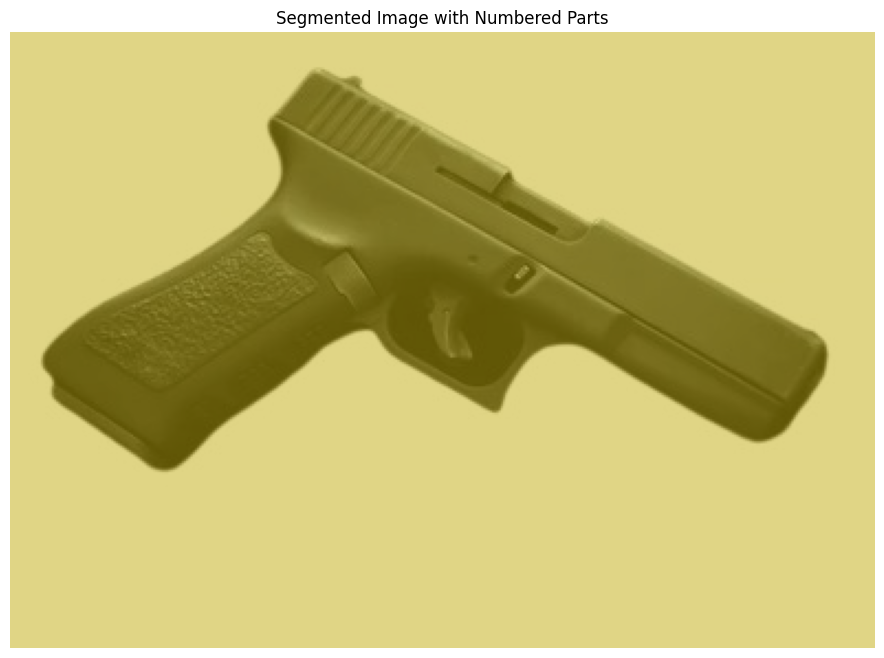

In [ ]:
# Create a color palette for classes
palette = np.random.randint(0, 255, size=(256, 3), dtype=np.uint8)
colored_seg = palette[pred]

# Show image with overlayed segment numbers
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.imshow(colored_seg, alpha=0.5)

# Add segment numbers on image
for seg_id in segments:
    if seg_id == 0:  # Usually background
        continue
    # Find centroid of this segment
    mask = (pred == seg_id).astype(np.uint8)
    M = cv2.moments(mask)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        plt.text(cX, cY, str(seg_id), color='white', fontsize=12, fontweight='bold')

plt.axis('off')
plt.title("Segmented Image with Numbered Parts")
plt.show()


In [ ]:
COCO_CLASSES = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow'
]

print("Segments and class names:")
for seg_id in segments:
    print(seg_id, COCO_CLASSES[seg_id])


Segments and class names:
0 background


In [ ]:
import torch
import torchvision
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load Mask R-CNN pre-trained on COCO
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load image
img_path = "/content/iiiii.jpg"
img = Image.open(img_path).convert("RGB")

# Convert to tensor for model input
img_tensor = F.to_tensor(img)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:03<00:00, 53.6MB/s]


All detected label IDs: [87 77 49 73 75 89 76]
Max label ID: 89
Length of COCO list: 81


IndexError: list index out of range

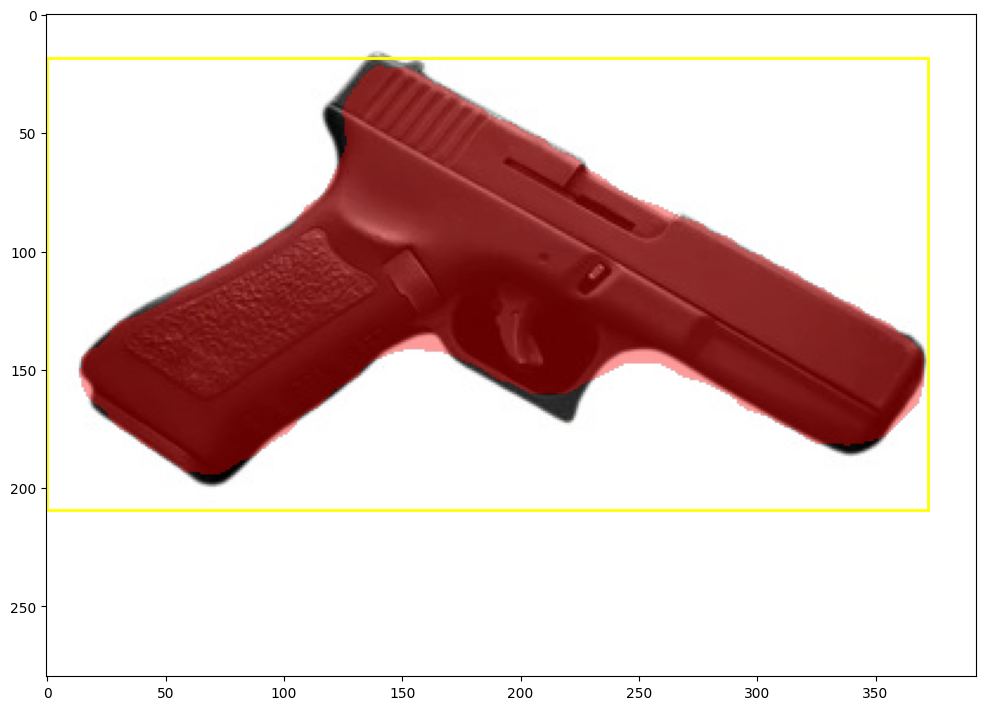

In [ ]:
import matplotlib.patches as patches
import torchvision

# Run model inference (wrap in no_grad for efficiency)
with torch.no_grad():
    prediction = model([img_tensor])[0]

# Extract results
masks = prediction['masks']  # segmentation masks (N, 1, H, W)
labels = prediction['labels']  # class labels
scores = prediction['scores']  # confidence scores
boxes = prediction['boxes']    # bounding boxes

# Set a confidence threshold to filter detections
threshold = 0.5

# Plot image and detected masks
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(img)

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]



print("All detected label IDs:", labels.cpu().numpy())
print("Max label ID:", labels.max().item())
print("Length of COCO list:", len(COCO_INSTANCE_CATEGORY_NAMES))

for i in range(len(scores)):
    if scores[i] > threshold:
        # Mask
        mask = masks[i, 0].mul(255).byte().cpu().numpy()
        # Create a color mask
        color_mask = np.zeros((*mask.shape, 4), dtype=np.uint8)
        color_mask[mask > 128] = [255, 0, 0, 100]  # red with alpha

        ax.imshow(color_mask)

        # Bounding box
        box = boxes[i].cpu().numpy()
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                 linewidth=2, edgecolor='yellow', facecolor='none')
        ax.add_patch(rect)

        # Label
        label = COCO_INSTANCE_CATEGORY_NAMES[labels[i].item()]

        ax.text(box[0], box[1] - 5, f"{label}: {scores[i]:.2f}",
                color='yellow', fontsize=12, weight='bold')

plt.axis('off')
plt.title("Mask R-CNN Detection & Segmentation")
plt.show()
